In [1]:
import pandas as pd

### Importo archivo Victimas_Homicidios

In [51]:
df_victimas = pd.read_excel("Victimas_Homicidios.xlsx")

In [52]:
df_victimas

,Id,Fecha,Año,Mes,Dia,Rol,Victima,Sexo,Edad,Fecha_Fallecimiento,Rango_Etario
0,2016-0001,2016-01-01,2016,1,1,Conductor,Moto,Masculino,19,2016-01-01,18-30
1,2016-0002,2016-01-02,2016,1,2,Conductor,Auto,Masculino,70,2016-01-02,50+
2,2016-0003,2016-01-03,2016,1,3,Conductor,Moto,Masculino,30,2016-01-03,30-50
3,2016-0005,2016-01-21,2016,1,21,Conductor,Moto,Masculino,29,2016-02-01,18-30
4,2016-0008,2016-01-24,2016,1,24,Conductor,Moto,Masculino,30,2016-01-24,30-50
...,...,...,...,...,...,...,...,...,...,...,...
581,2021-0092,2021-12-12,2021,12,12,Peaton,Peaton,Femenino,50,2021-12-12,50+
582,2021-0093,2021-12-13,2021,12,13,Pasajero Acompañante,Moto,Femenino,18,2021-12-18,18-30
583,2021-0094,2021-12-20,2021,12,20,Pasajero Acompañante,Moto,Femenino,43,2021-12-20,30-50
584,2021-0095,2021-12-30,2021,12,30,Conductor,Moto,Masculino,27,2022-01-02,18-30


### Creo columna Semestre

In [53]:
df_victimas['Semestre'] = df_victimas['Mes'].apply(lambda mes: 1 if mes <= 6 else 2)

### Mantengo las columnas 'Id','Año', 'Semestre','Sexo'

In [54]:
df_victimas = df_victimas[['Id','Año', 'Semestre','Sexo']]

In [55]:
df_victimas

,Id,Año,Semestre,Sexo
0,2016-0001,2016,1,Masculino
1,2016-0002,2016,1,Masculino
2,2016-0003,2016,1,Masculino
3,2016-0005,2016,1,Masculino
4,2016-0008,2016,1,Masculino
...,...,...,...,...
581,2021-0092,2021,2,Femenino
582,2021-0093,2021,2,Femenino
583,2021-0094,2021,2,Femenino
584,2021-0095,2021,2,Masculino


### Importo archivo Hechos_Homicidios y mantengo columnas 'Id', 'Comuna'

In [56]:
df_hechos = pd.read_excel("Hechos_Homicidios.xlsx")

In [59]:
df_hechos = df_hechos[['Id', 'Comuna']]

### Junto ambos df usando columna Id como referencia

In [60]:
df_victimas = pd.merge(df_victimas, df_hechos, on= 'Id')

In [63]:
df_victimas

,Id,Año,Semestre,Sexo,Comuna
0,2016-0001,2016,1,Masculino,8
1,2016-0002,2016,1,Masculino,9
2,2016-0003,2016,1,Masculino,1
3,2016-0005,2016,1,Masculino,1
4,2016-0008,2016,1,Masculino,8
...,...,...,...,...,...
581,2021-0092,2021,2,Femenino,3
582,2021-0093,2021,2,Femenino,7
583,2021-0094,2021,2,Femenino,9
584,2021-0095,2021,2,Masculino,11


### Agrupo df usando columnas 'Año', 'Semestre', 'Sexo','Comuna'. Creo una columna 'Conteo' para saber cuantos registros hay

In [64]:
df_victimas = df_victimas.groupby(['Año', 'Semestre', 'Sexo','Comuna']).size().reset_index(name='Conteo')

In [65]:
df_victimas

,Año,Semestre,Sexo,Comuna,Conteo
0,2016,1,Femenino,1,1
1,2016,1,Femenino,4,1
2,2016,1,Femenino,6,1
3,2016,1,Femenino,8,1
4,2016,1,Femenino,9,1
...,...,...,...,...,...
246,2021,2,Masculino,10,1
247,2021,2,Masculino,11,4
248,2021,2,Masculino,12,3
249,2021,2,Masculino,13,2


### Calculo proporción de cuantas veces aparece los valores

In [66]:
proporcion = df_victimas.groupby(['Año','Semestre', 'Sexo','Comuna'])['Conteo'].sum() / df_victimas.groupby('Semestre')['Conteo'].sum() * 100
proporcion = proporcion.reset_index(name='Proporción')

In [67]:
proporcion['Conteo'] = df_victimas['Conteo']

In [68]:
proporcion

,Año,Semestre,Sexo,Comuna,Proporción,Conteo
0,2016,1,Femenino,1,0.344828,1
1,2016,1,Femenino,4,0.344828,1
2,2016,1,Femenino,6,0.344828,1
3,2016,1,Femenino,8,0.344828,1
4,2016,1,Femenino,9,0.344828,1
...,...,...,...,...,...,...
246,2021,2,Masculino,10,0.337838,1
247,2021,2,Masculino,11,1.351351,4
248,2021,2,Masculino,12,1.013514,3
249,2021,2,Masculino,13,0.675676,2


### Grafico las proporciones comparando los sexos masculino y feminino

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\anton\AppData\Local\Temp\ipykernel_1240\1692244474.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(x='Año', y='Proporción', hue='Sexo', data=proporcion, ci= False)


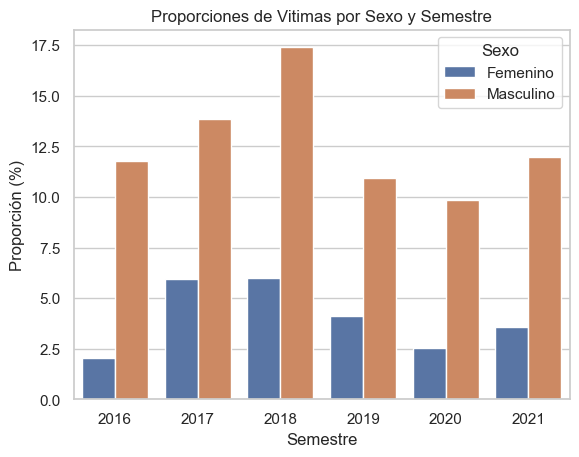

In [45]:
sns.set(style='whitegrid')  
sns.barplot(x='Año', y='Proporción', hue='Sexo', data=proporcion, ci= False)

plt.xlabel('Semestre')
plt.ylabel('Proporción (%)')
plt.title('Proporciones de Vitimas por Sexo y Semestre')

plt.show()

### Guardo df final en archivo XLSX

In [69]:
proporcion.to_excel('Proporcion_sexos.xlsx', index= False)